In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données

In [2]:
X = [2,3,5,9,10,12,15]
Y = [23,27,28,39,39,45,51]

In [3]:
X = np.array(X)
Y = np.array(Y)

In [212]:
print ("{:<15} | {:<15} |".format('Nbr Visites (X)','Commandes (Y)'))
for i in range(len(X)):
    
    print ("{:<15} | {:<15} |".format(X[i], Y[i]))

Nbr Visites (X) | Commandes (Y)   |
2               | 23              |
3               | 27              |
5               | 28              |
9               | 39              |
10              | 39              |
12              | 45              |
15              | 51              |


## Visualisation des données
Représentation d'un nuage de points des données

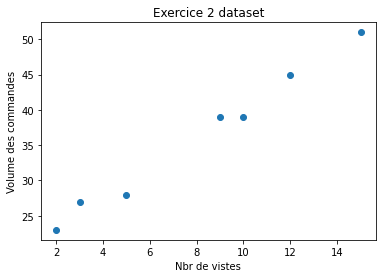

In [213]:
plt.scatter(X,Y)
plt.xlabel('Nbr de vistes')
plt.ylabel('Volume des commandes')
plt.title('Exercice 2 dataset')
plt.show()

# Définition des hyperparamtres 

In [214]:
#taux_apprentissage 
#alpha= 0.001
alpha = 0.01/2 #0.001
initial_b = 0
initial_a = 0
num_iterations = 80

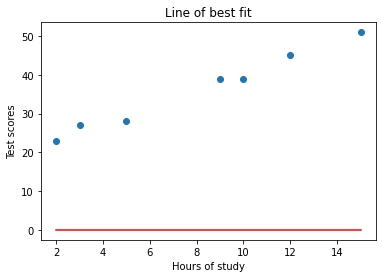

In [215]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = initial_a * X + initial_b
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

## Définition de la fonction Coût (Cost fonction)

<img align="left" src="mse.jpg" width="400" height="300"/> <img align="left" src="line.png" width="400" height="300"/>

In [216]:
def fonction_cout(b, a, X,Y):
    total_cost = 0
    N = float(len(X))
    x= X
    y= Y
    #Compute sum of squared errors
    for i in range(0, len(X)):
        x = X[i]
        y = Y[i]
        total_cost += (y - (a * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

In [217]:
def iteration_gradient(b_current, m_current, X,Y, alpha):
    m_gradient = 0
    b_gradient = 0
    N = float(len(X))

    #Calculate Gradient
    for i in range(0, len(X)):
        x = X[i]
        y = Y[i]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

In [218]:
def gradient_descent_runner(X,Y, starting_b, starting_a, alpha, num_iterations):
    b = starting_b
    a = starting_a
    cost_graph = []
    
    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(fonction_cout(b, a, X,Y))
        b, m = iteration_gradient(b, a, X,Y, alpha)

    return [b, m, cost_graph]

In [219]:
initial_b

0

In [220]:
initial_b = np.random.rand()
initial_a = np.random.rand()

In [154]:
b, a, cost_graph = gradient_descent_runner(X,Y, 0, 0, 0.01/2, 80)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized a:', a)

#Print error with optimized parameters
print ('Minimized cost:', fonction_cout(b, a, X,Y))

Optimized b: 19.88916430450281
Optimized a: 1.7261714270531638
Minimized cost: 9.554975500827643


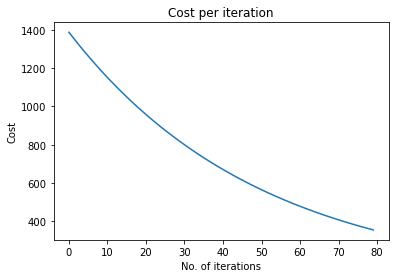

In [155]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

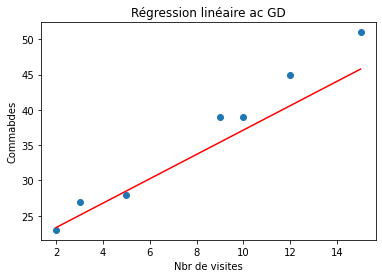

In [234]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = a * X + b
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Nbr de visites')
plt.ylabel('Commabdes')
plt.title('Régression linéaire ac GD')
plt.show()

In [158]:
a,b

(1.7261714270531638, 19.88916430450281)

## Méthode des moindres carrées

In [159]:
from statistics import covariance,variance

In [160]:
a1 = covariance(X,Y) / variance(X)

In [161]:
b1 = Y.mean() - a1*X.mean()

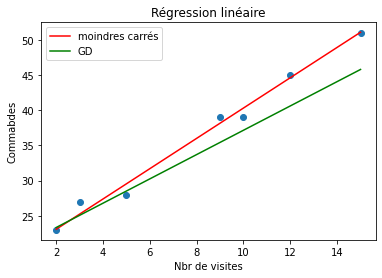

In [242]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred1 = a1 * X + b1
#Plot predictions as line of best fit
plt.plot(X, pred1, c='r',label="moindres carrés")

plt.plot(X, a * X + b, c='g',label="GD")

plt.xlabel('Nbr de visites')
plt.ylabel('Commabdes')
plt.title('Régression linéaire')
plt.legend(loc='best')
plt.show()

comparer la fonction coût

In [164]:
print("fonction cout avec les moindres carrés",fonction_cout(b1,a1,X,Y))

fonction cout avec les moindres carrés 1.1525789900081016


In [243]:
print("fonction cout avec la descente du Gradient",fonction_cout(b,a,X,Y))

fonction cout avec la descente du Gradient 9.554975500827643


In [244]:
# Comparer le temps d'exécution

## Moindres carrés : formules plus simples

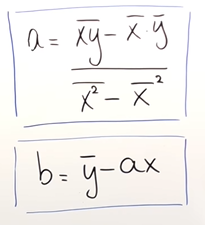

In [229]:
a2 = ((X*Y).mean() - (X.mean() * Y.mean())) / ((X*X).mean() - X.mean()* X.mean())
b2 = Y.mean() - a2 * X.mean()

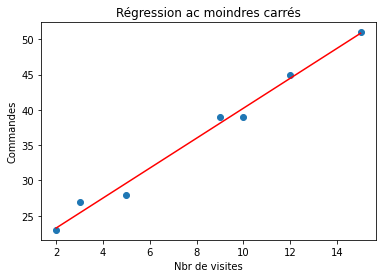

In [232]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = a2 * X + b2
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Nbr de visites')
plt.ylabel('Commandes')
plt.title('Régression ac moindres carrés')
plt.show()